In [16]:
import pandas as pd
import geopandas as gpd

import numpy as np
import matplotlib.pyplot as plt #for creating plots
from scipy import stats
import seaborn as sns #for styling the plots
#warnings.filterwarnings('ignore')
%matplotlib inline 

In [17]:

NYChousing = pd.read_csv(r'C:\Users\Nicole\Downloads\Housing_New_York_Units_by_Building.csv')
NYChousing.head()

,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,...,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units
0,69441,WFHA BROOKLYN LP.YR15.FY21,03/31/2021,NaN,209164.0,992,BERGEN STREET,Brooklyn,11216.0,3.012170e+09,...,3,0,0,0,0,0,4,0,4,4
1,69441,WFHA BROOKLYN LP.YR15.FY21,03/31/2021,NaN,295918.0,658,FRANKLIN AVENUE,Brooklyn,11238.0,3.011560e+09,...,6,0,0,0,0,0,9,0,9,9
2,69441,WFHA BROOKLYN LP.YR15.FY21,03/31/2021,NaN,295950.0,693,FRANKLIN AVENUE,Brooklyn,11238.0,3.012310e+09,...,6,1,0,0,0,0,8,0,8,8
3,69441,WFHA BROOKLYN LP.YR15.FY21,03/31/2021,NaN,295952.0,695,FRANKLIN AVENUE,Brooklyn,11238.0,3.012310e+09,...,6,1,0,0,0,0,8,0,8,8
4,69441,WFHA BROOKLYN LP.YR15.FY21,03/31/2021,NaN,295953.0,697,FRANKLIN AVENUE,Brooklyn,11238.0,3.012310e+09,...,6,1,0,0,0,0,8,0,8,8


In [18]:
NYChousing.dropna()

,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,...,2-BR Units,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units
103,70165,BROOK AND BROWN HDFC,12/31/2020,12/31/2020,52669.0,199,BROOK AVENUE,Bronx,10454.0,2.022640e+09,...,10,1,0,0,0,0,16,0,16,16
104,70165,BROOK AND BROWN HDFC,12/31/2020,12/31/2020,52670.0,205,BROOK AVENUE,Bronx,10454.0,2.022640e+09,...,16,1,0,0,0,0,40,0,40,40
105,70165,BROOK AND BROWN HDFC,12/31/2020,12/31/2020,52794.0,198,BROWN PLACE,Bronx,10454.0,2.022640e+09,...,12,1,0,0,0,0,19,0,19,19
106,70165,BROOK AND BROWN HDFC,12/31/2020,12/31/2020,52795.0,202,BROWN PLACE,Bronx,10454.0,2.022640e+09,...,19,0,0,0,0,0,20,0,20,20
420,68410,272 EAST 7TH STREET,06/26/2020,06/26/2020,11158.0,272,EAST 7 STREET,Manhattan,10009.0,1.003760e+09,...,3,0,0,0,0,0,21,0,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5028,50196,Belmont Venezia,01/22/2014,04/13/2015,59948.0,2404,CROTONA AVENUE,Bronx,10458.0,2.031040e+09,...,9,11,0,0,0,0,24,0,24,24
5029,50196,Belmont Venezia,01/22/2014,04/13/2015,87351.0,2476,HUGHES AVENUE,Bronx,10458.0,2.030760e+09,...,23,17,0,0,0,0,63,0,63,63
5030,50196,Belmont Venezia,01/22/2014,04/13/2015,806409.0,2412,CROTONA AVENUE,Bronx,10458.0,2.031040e+09,...,9,0,0,0,0,0,25,0,25,25
5031,50196,Belmont Venezia,01/22/2014,04/13/2015,806410.0,2416,CROTONA AVENUE,Bronx,10458.0,2.031040e+09,...,9,0,0,0,0,0,25,0,25,25


In [19]:
NYChousing2 = NYChousing.dropna()

In [20]:
## zip codes map
zips = gpd.read_file(r'C:\Users\Nicole\Downloads\ZIP_CODE_040114')
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


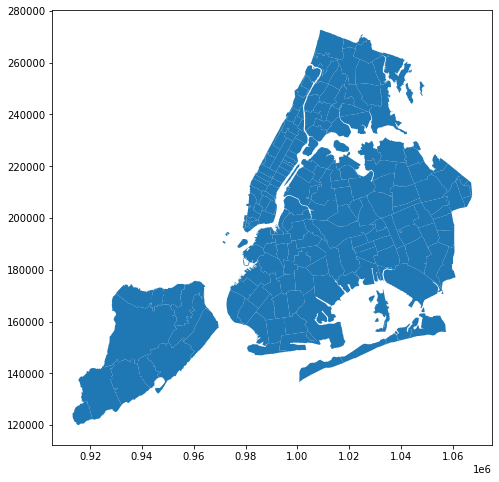

In [21]:
zips.plot(figsize=(8,8))

In [22]:
import geopandas as gpd
#merge with shape file first
df_geometry = gpd.GeoDataFrame(NYChousing2, geometry=gpd.points_from_xy(NYChousing2.Longitude, NYChousing2.Latitude))
sjoin_NYC = gpd.sjoin(df_geometry, zips, how="left", op='intersects')

<ipython-input-22-69e8289040c1>:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:2263

  sjoin_NYC = gpd.sjoin(df_geometry, zips, how="left", op='intersects')


In [23]:
df_geometry

,Project ID,Project Name,Project Start Date,Project Completion Date,Building ID,Number,Street,Borough,Postcode,BBL,...,3-BR Units,4-BR Units,5-BR Units,6-BR+ Units,Unknown-BR Units,Counted Rental Units,Counted Homeownership Units,All Counted Units,Total Units,geometry
103,70165,BROOK AND BROWN HDFC,12/31/2020,12/31/2020,52669.0,199,BROOK AVENUE,Bronx,10454.0,2.022640e+09,...,1,0,0,0,0,16,0,16,16,POINT (-73.91999 40.80653)
104,70165,BROOK AND BROWN HDFC,12/31/2020,12/31/2020,52670.0,205,BROOK AVENUE,Bronx,10454.0,2.022640e+09,...,1,0,0,0,0,40,0,40,40,POINT (-73.91987 40.80668)
105,70165,BROOK AND BROWN HDFC,12/31/2020,12/31/2020,52794.0,198,BROWN PLACE,Bronx,10454.0,2.022640e+09,...,1,0,0,0,0,19,0,19,19,POINT (-73.92074 40.80693)
106,70165,BROOK AND BROWN HDFC,12/31/2020,12/31/2020,52795.0,202,BROWN PLACE,Bronx,10454.0,2.022640e+09,...,0,0,0,0,0,20,0,20,20,POINT (-73.92069 40.80700)
420,68410,272 EAST 7TH STREET,06/26/2020,06/26/2020,11158.0,272,EAST 7 STREET,Manhattan,10009.0,1.003760e+09,...,0,0,0,0,0,21,0,21,21,POINT (-73.97748 40.72349)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5028,50196,Belmont Venezia,01/22/2014,04/13/2015,59948.0,2404,CROTONA AVENUE,Bronx,10458.0,2.031040e+09,...,11,0,0,0,0,24,0,24,24,POINT (-73.88341 40.85431)
5029,50196,Belmont Venezia,01/22/2014,04/13/2015,87351.0,2476,HUGHES AVENUE,Bronx,10458.0,2.030760e+09,...,17,0,0,0,0,63,0,63,63,POINT (-73.88540 40.85693)
5030,50196,Belmont Venezia,01/22/2014,04/13/2015,806409.0,2412,CROTONA AVENUE,Bronx,10458.0,2.031040e+09,...,0,0,0,0,0,25,0,25,25,POINT (-73.88333 40.85448)
5031,50196,Belmont Venezia,01/22/2014,04/13/2015,806410.0,2416,CROTONA AVENUE,Bronx,10458.0,2.031040e+09,...,0,0,0,0,0,25,0,25,25,POINT (-73.88329 40.85455)


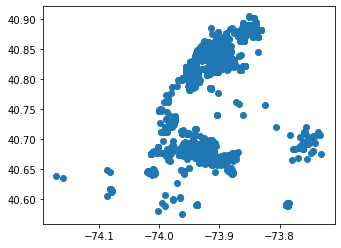

In [24]:
sjoin_NYC.plot()

In [25]:
# now group by zip codes, normalize by their population
lowincomebyzip= NYChousing2[['Postcode', 'Very Low Income Units']].groupby(by='Postcode', as_index=False).count()
lowincomebyzip


,Postcode,Very Low Income Units
0,10001.0,8
1,10002.0,28
2,10003.0,2
3,10009.0,76
4,10010.0,27
...,...,...
91,11429.0,4
92,11432.0,1
93,11433.0,1
94,11434.0,7


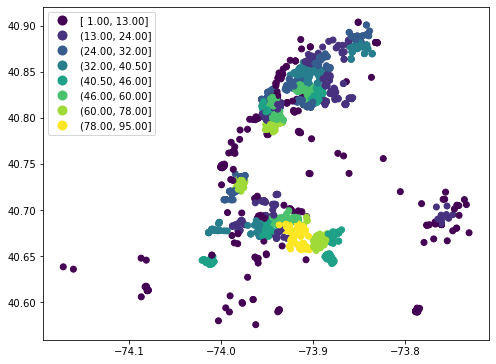

In [26]:
Geo = sjoin_NYC.merge(lowincomebyzip,left_on='Postcode',right_on='Postcode',how='left')
# plot as a heatmap with quantiles color scheme
Geo.plot(figsize=(8,8),column ='Very Low Income Units_y',k=8,scheme='Quantiles',legend=True,legend_kwds={'loc':'upper left'})

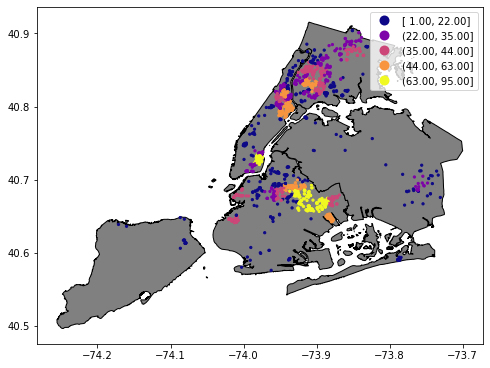

In [27]:
boundary = gpd.read_file(r'C:\Users\Nicole\Downloads\Borough Boundaries\geo_export_402abf60-ff4f-4bd7-a85b-460323a12e85.shp')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(8, 8))
base = boundary.plot(ax=ax, color='grey', edgecolor='black')
Geo.plot(ax=ax, column='Very Low Income Units_y', cmap='plasma',scheme='quantiles', marker='o', markersize=5, legend=True);

In [28]:
boundary.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   boro_code   5 non-null      float64 
 1   boro_name   5 non-null      object  
 2   shape_area  5 non-null      float64 
 3   shape_leng  5 non-null      float64 
 4   geometry    5 non-null      geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 328.0+ bytes


In [29]:
transitzones = gpd.read_file(r'C:\Users\Nicole\Downloads\nyctransitzones_201902\nyctransitzones_201902.shp')


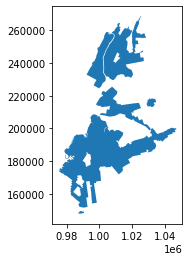

In [30]:
transitzones.plot()

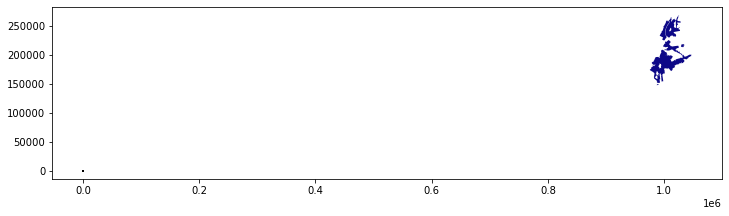

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12, 12))
base = boundary.plot(ax=ax, color='grey', edgecolor='black')
transitzones.plot(ax=ax, cmap='plasma', scheme='quantiles', marker='o', markersize=10, legend=True);

In [32]:
NYCHADevelopment = gpd.read_file(r'C:\Users\Nicole\Downloads\Map of NYCHA Developments\geo_export_8a3e9f79-46a8-495c-aae2-5c7be0a3966a.shp')

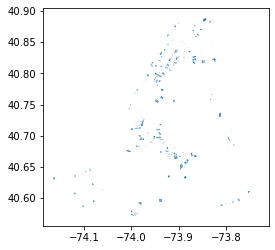

In [33]:
NYCHADevelopment.plot()

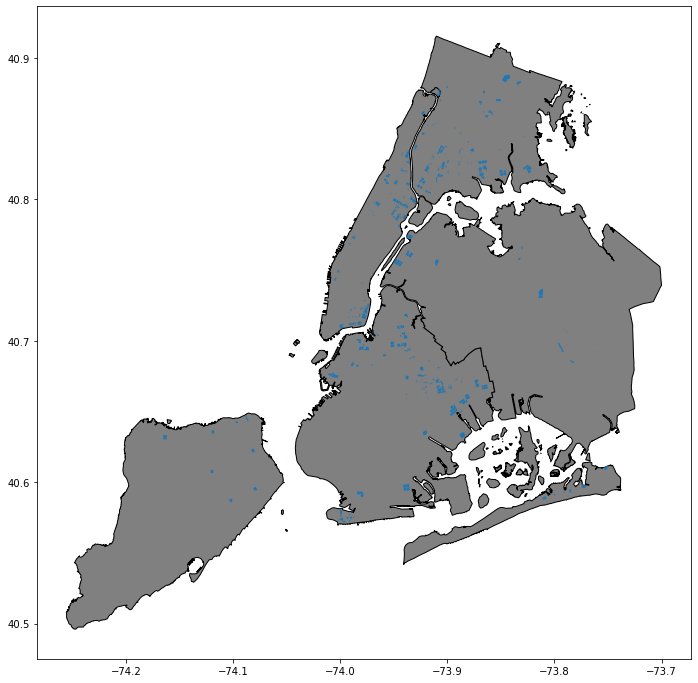

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12, 12))
base = boundary.plot(ax=ax, color='grey', edgecolor='black')
NYCHADevelopment.plot(ax=ax, marker='o', markersize=30, legend=True);

In [35]:

NYCompany = pd.read_csv(r'C:\Users\Nicole\Downloads\Mapped_In_NY_Companies.csv')
NYCompany.head()

,Company Name,Address,Address2,City,Category Name,URL,Hiring,Jobs URL,Why NYC,Postcode,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,"""Document Prep-Program""'",' - ',' - ',' - ',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""More than just Figleaves'",' - ',' - ',' - ',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#Fit4ME',' - ',' - ',' - ',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,'brellaBox',' - ',' - ',' - ',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,'wichcraft',' - ',' - ',' - ',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
NYCompany = NYCompany.drop(columns=['URL','Category Name','Hiring','Jobs URL','Why NYC'])

In [37]:
NYCompany.head()

,Company Name,Address,Address2,City,Postcode,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,"""Document Prep-Program""'",' - ',' - ',' - ',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""More than just Figleaves'",' - ',' - ',' - ',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#Fit4ME',' - ',' - ',' - ',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,'brellaBox',' - ',' - ',' - ',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,'wichcraft',' - ',' - ',' - ',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
NYCompany1 = NYCompany.dropna()
NYCompany1

,Company Name,Address,Address2,City,Postcode,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
9,10 Speed Labs','1239 Broadway','Penthouse','New York',10001.0,MANHATTAN,40.747135,-73.988397,5.0,3.0,76.0,1082273.0,1.008320e+09,Midtown-Midtown South ...
17,1800Postcards.com','121 Varick Street','4th Floor','New York',10013.0,MANHATTAN,40.724861,-74.005946,2.0,3.0,37.0,1009728.0,1.005780e+09,SoHo-TriBeCa-Civic Center-Little Italy ...
20,1938 News','1 Astor Pl',' - ','New York',10003.0,MANHATTAN,40.730054,-73.992629,2.0,2.0,57.0,1008806.0,1.005450e+09,West Village ...
21,1DocWay',"'483 Broadway, Floor 2, New York, NY 10013'","'483 Broadway, Floor 2'",'New York',10013.0,MANHATTAN,40.721543,-74.000076,2.0,1.0,47.0,1007048.0,1.004740e+09,SoHo-TriBeCa-Civic Center-Little Italy ...
27,1stdibs.com','51 Astor Place','Third Floor','New York',10003.0,MANHATTAN,40.730183,-73.990460,3.0,2.0,42.0,1089443.0,1.005540e+09,East Village ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6288,unfounded labs','46 mulberry st',' - ','New York',10013.0,MANHATTAN,40.715002,-73.999628,3.0,1.0,29.0,1079227.0,1.001640e+09,Chinatown ...
6294,vente-privee USA','1 Liberty Plaza','22nd Floor','New York',10006.0,MANHATTAN,40.709430,-74.011102,1.0,1.0,13.0,1001068.0,1.000628e+09,Battery Park City-Lower Manhattan ...
6309,where@','173 Avenue A ','Suite 17','New York',10009.0,MANHATTAN,40.728360,-73.981866,3.0,2.0,34.0,1005944.0,1.004380e+09,East Village ...
6320,www.jobclickr.com','1116 east 224th street','suite 2','Bronx',10466.0,BRONX,40.883078,-73.848643,12.0,12.0,386.0,2065895.0,2.049020e+09,Eastchester-Edenwald-Baychester ...


In [39]:
import geopandas as gpd
#merge with shape file first
df_geometry_3 = gpd.GeoDataFrame(NYCompany1, geometry=gpd.points_from_xy(NYCompany1.Longitude, NYCompany1.Latitude))
sjoin_NYC_3 = gpd.sjoin(df_geometry_3, zips, how="left", op='intersects')

<ipython-input-39-8c788f893d3f>:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:2263

  sjoin_NYC_3 = gpd.sjoin(df_geometry_3, zips, how="left", op='intersects')


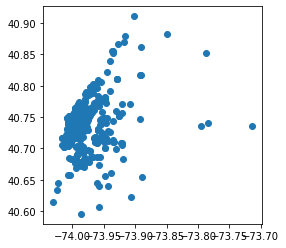

In [40]:
sjoin_NYC_3.plot()

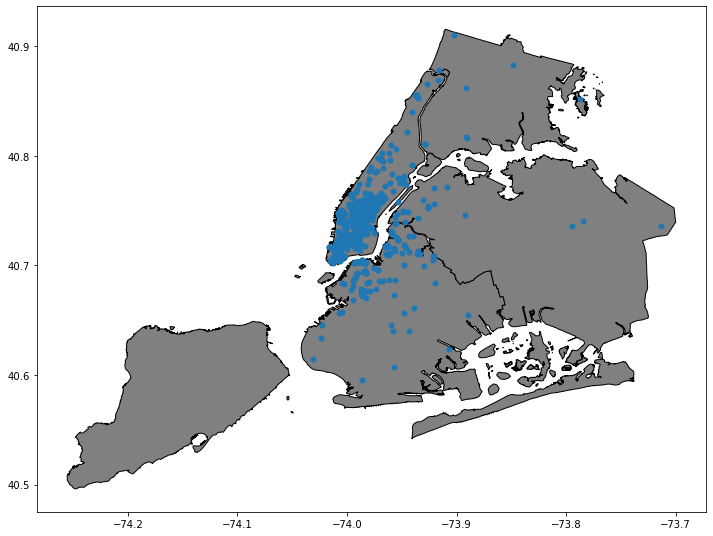

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12, 12))
base = boundary.plot(ax=ax, color='grey', edgecolor='black')
sjoin_NYC_3.plot(ax=ax, marker='o', markersize=25, legend=True);


In [42]:
NYC_subway_stations = gpd.read_file(r'C:\Users\Nicole\Downloads\geo_export_c79ab55f-37ad-468b-aa6c-56ef5d036378.shp')

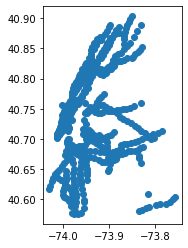

In [43]:
NYC_subway_stations.plot()

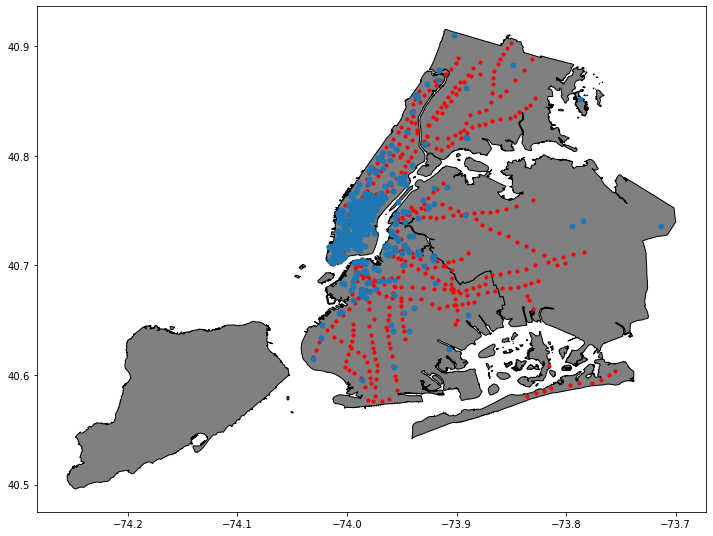

In [48]:
boundary = gpd.read_file(r'C:\Users\Nicole\Downloads\Borough Boundaries\geo_export_402abf60-ff4f-4bd7-a85b-460323a12e85.shp')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12, 12))
base = boundary.plot(ax=ax, color='grey', edgecolor='black')
NYC_subway_stations.plot(ax=ax, marker='o', color = 'red',markersize=10, legend=True);
sjoin_NYC_3.plot(ax=ax, marker='o', markersize=25, legend=True);
